
======= RETAIL ANALYZER MENU =======
1. Load Data
2. Clean Data
3. Calculate Metrics
4. Filter Data
5. Display Summary
6. Plot Total Sales by Category (Bar)
7. Plot Sales Trend Over Time (Line)
8. Plot Correlation Heatmap
9. Exit


Enter your choice (1-9):  1
Enter the CSV file path or name:  sales_data.csv


          date     product         category  price  quantity sold  total_sale
0     3/5/2025  Headphones        Computers  50969              1       50969
1     2/8/2025     Monitor        Computers  46594             16      745504
2    3/31/2025      Laptop      Accessories  53765              3      161295
3    4/30/2025    Keyboard      Electronics  42111              4      168444
4    3/29/2025  Smartphone      Electronics  25883             19      491777
..         ...         ...              ...    ...            ...         ...
495  2/21/2025    Keyboard      Accessories  20742              8      165936
496  6/10/2025     Printer  Office Supplies  99204              1       99204
497  5/22/2025      Router  Office Supplies    638              3        1914
498   9/5/2025       Mouse  Office Supplies  16552              7      115864
499  8/14/2025      Webcam        Computers  59306              8      474448

[500 rows x 6 columns] Dataset loaded successfully! Shape: (500

Enter your choice (1-9):  3


Total Sales: 277,728,667.00
Average Sale per Transaction: 555,457.33

======= RETAIL ANALYZER MENU =======
1. Load Data
2. Clean Data
3. Calculate Metrics
4. Filter Data
5. Display Summary
6. Plot Total Sales by Category (Bar)
7. Plot Sales Trend Over Time (Line)
8. Plot Correlation Heatmap
9. Exit


Enter your choice (1-9):  3


Total Sales: 277,728,667.00
Average Sale per Transaction: 555,457.33

======= RETAIL ANALYZER MENU =======
1. Load Data
2. Clean Data
3. Calculate Metrics
4. Filter Data
5. Display Summary
6. Plot Total Sales by Category (Bar)
7. Plot Sales Trend Over Time (Line)
8. Plot Correlation Heatmap
9. Exit


Enter your choice (1-9):  4
Filter by product (leave blank for none):  
Filter by category (leave blank for none):  
Price min (leave blank for none):  80
Price max (leave blank for none):  120
Total Sale min (leave blank for none):  
Total Sale max (leave blank for none):  



Filtered records: 0

======= RETAIL ANALYZER MENU =======
1. Load Data
2. Clean Data
3. Calculate Metrics
4. Filter Data
5. Display Summary
6. Plot Total Sales by Category (Bar)
7. Plot Sales Trend Over Time (Line)
8. Plot Correlation Heatmap
9. Exit


Enter your choice (1-9):  5



===== SALES SUMMARY =====
Total Records: 500
Total Sales: 277,728,667.00
Average Sale per Transaction: 555,457.33

Sales by Category:
category
Accessories        75814304
Electronics        70231249
Computers          66440403
Office Supplies    65242711

======= RETAIL ANALYZER MENU =======
1. Load Data
2. Clean Data
3. Calculate Metrics
4. Filter Data
5. Display Summary
6. Plot Total Sales by Category (Bar)
7. Plot Sales Trend Over Time (Line)
8. Plot Correlation Heatmap
9. Exit


Enter your choice (1-9):  6


C:\Users\Ibhrahim ansari\AppData\Local\Temp\ipykernel_25568\3789169364.py:170: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="viridis")


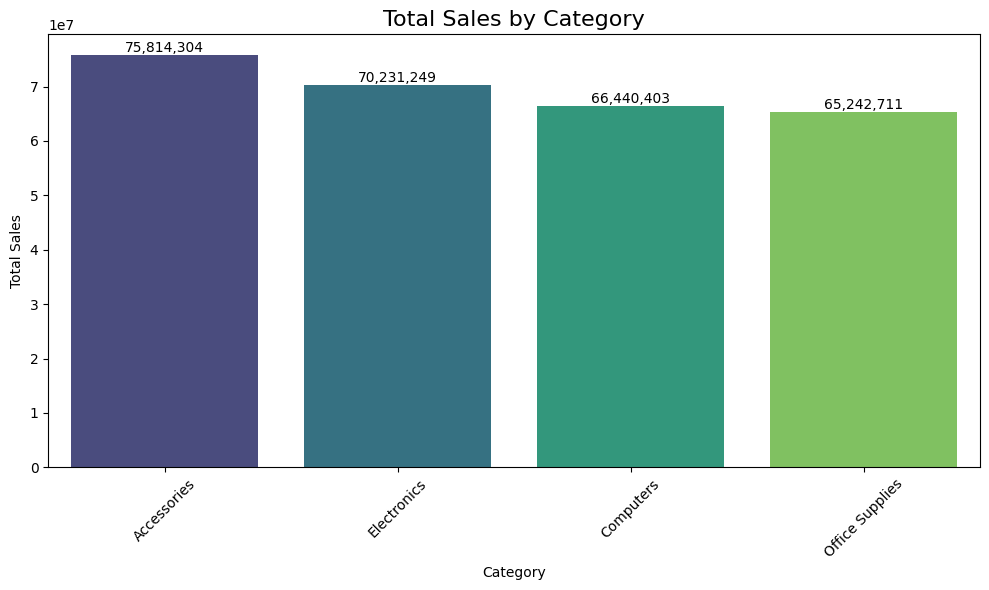


======= RETAIL ANALYZER MENU =======
1. Load Data
2. Clean Data
3. Calculate Metrics
4. Filter Data
5. Display Summary
6. Plot Total Sales by Category (Bar)
7. Plot Sales Trend Over Time (Line)
8. Plot Correlation Heatmap
9. Exit


Enter your choice (1-9):  7


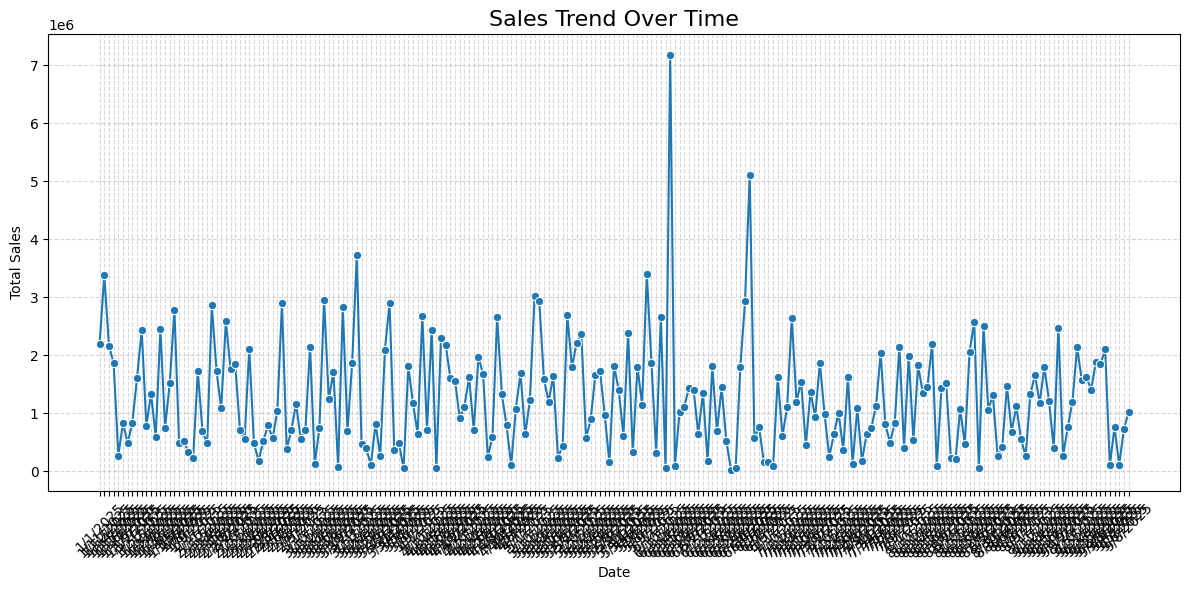


======= RETAIL ANALYZER MENU =======
1. Load Data
2. Clean Data
3. Calculate Metrics
4. Filter Data
5. Display Summary
6. Plot Total Sales by Category (Bar)
7. Plot Sales Trend Over Time (Line)
8. Plot Correlation Heatmap
9. Exit


Enter your choice (1-9):  8


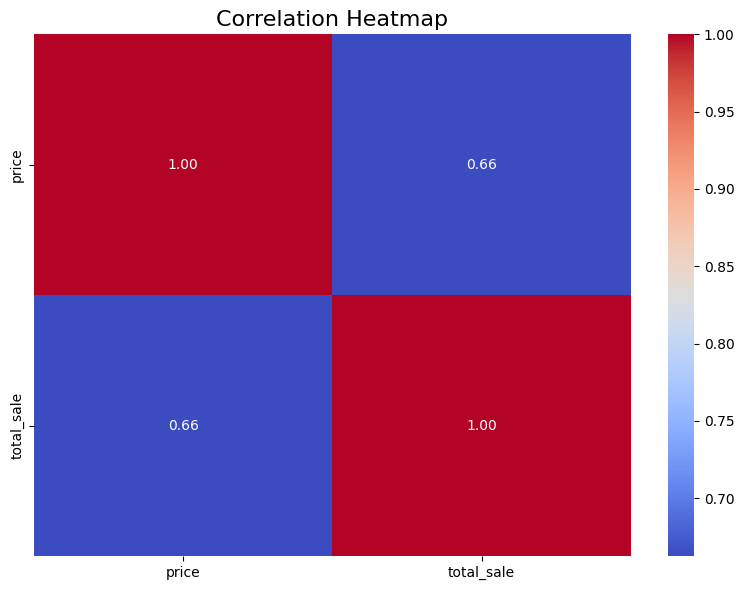


======= RETAIL ANALYZER MENU =======
1. Load Data
2. Clean Data
3. Calculate Metrics
4. Filter Data
5. Display Summary
6. Plot Total Sales by Category (Bar)
7. Plot Sales Trend Over Time (Line)
8. Plot Correlation Heatmap
9. Exit


Enter your choice (1-9):  9


Exiting... Goodbye!


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class RetailAnalyzer:
    def __init__(self):
        self.data = None

    def load_data(self):
        file_path = input("Enter the CSV file path or name: ").strip('"')
        try:
            self.data = pd.read_csv(file_path)
            print(self.data,"Dataset loaded successfully! Shape:", self.data.shape)
        except FileNotFoundError:
            print("File not found! Please check the path and try again.")

    def clean_data(self):
        if self.data is None:
            print("No data to clean. Load a dataset first.")
            return

        print("Starting data cleaning and standardization...")

        
        self.data.columns = [c.strip().lower().replace(" ", "_") for c in self.data.columns]
        current_cols = set(self.data.columns)

        
        standard_cols_map = {
            
            "total_sale": ["total_sale", "gross_sale", "sales_amount", "revenue", "amount", "total", "total_sales"], 
            "quantity_sold": ["quantity_sold", "quantity", "qty", "units"],
            "price": ["price", "unit_price", "cost"],
            "product": ["product", "item_name", "description"],
            "category": ["category", "type", "department"],
            
            "date": ["date", "transaction_date", "order_date", "date(yyyy-mm-dd)"] 
        }

        
        col_map = {}
        for std_col, variants in standard_cols_map.items():
            for variant in variants:
                for c in current_cols:
                    if variant == c or variant in c: 
                        if c not in col_map: 
                            col_map[c] = std_col
                            break
        
        self.data.rename(columns=col_map, inplace=True)
        print("Columns standardized.")
        current_cols_after_map = set(self.data.columns)


        
        
        
        if "date" in current_cols_after_map:
            self.data["date"] = pd.to_datetime(self.data["date"], errors="coerce")

        
        for c in self.data.select_dtypes(include=["object"]).columns:
            self.data[c] = self.data[c].astype(str).str.strip()

        
        if "price" in current_cols_after_map and "product" in current_cols_after_map:
            self.data["price"] = self.data.groupby("product")["price"].transform(lambda x: x.fillna(x.median()))
            self.data["price"] = self.data["price"].fillna(self.data["price"].median()).round(2)

        
        if "quantity_sold" in current_cols_after_map:
            
            self.data["quantity_sold"] = pd.to_numeric(self.data["quantity_sold"], errors='coerce').fillna(0).astype(int)

        
        if "total_sale" not in self.data.columns:
            if "price" in self.data.columns and "quantity_sold" in self.data.columns:
                print("Calculating 'total_sale' from 'price' * 'quantity_sold'.")
                # Ensure price and quantity are numeric (and handle potential NaNs defensively)
                price = pd.to_numeric(self.data["price"], errors='coerce').fillna(0)
                quantity = pd.to_numeric(self.data["quantity_sold"], errors='coerce').fillna(0)
                self.data["total_sale"] = (price * quantity).round(2)
            else:
                print("Warning: Cannot create 'total_sale'. Missing 'price' or 'quantity_sold' columns.")
        
        
        if "total_sale" not in self.data.columns:
            print("CRITICAL: 'total_sale' column still missing. Metrics methods will fail.")
        
        print("Data cleaning complete.")


    def calculate_matrics(self):
        if self.data is None:
            print("No data loaded.")
            return
        
        if "total_sale" not in self.data.columns:
            print("Error: 'total_sale' column is missing. Please ensure data is loaded and cleaned properly.")
            return

        total_sales = self.data["total_sale"].sum()
        avg_sales = self.data["total_sale"].mean()
        print(f"Total Sales: {total_sales:,.2f}")
        print(f"Average Sale per Transaction: {avg_sales:,.2f}")

        if "quantity_sold" in self.data.columns:
            product_sales = self.data.groupby("product")["quantity_sold"].sum()
            most_popular_product = product_sales.idxmax()
            most_popular_quantity = product_sales.max()
            print(f"Most Popular Product: {most_popular_product} (Sold: {most_popular_quantity})")

    def filter_data(self, product=None, category=None, price_range=None, sale_range=None):
        if self.data is None:
            print("No data loaded.")
            return pd.DataFrame()

        filtered_df = self.data.copy()
        if product and "product" in filtered_df.columns:
            filtered_df = filtered_df[filtered_df["product"].str.lower() == product.lower()]
        if category and "category" in filtered_df.columns:
            filtered_df = filtered_df[filtered_df["category"].str.lower() == category.lower()]
        if price_range and "price" in filtered_df.columns:
            filtered_df = filtered_df[(filtered_df["price"] >= price_range[0]) & (filtered_df["price"] <= price_range[1])]
        if sale_range and "total_sale" in filtered_df.columns:
            filtered_df = filtered_df[(filtered_df["total_sale"] >= sale_range[0]) & (filtered_df["total_sale"] <= sale_range[1])]

        print(f"\nFiltered records: {len(filtered_df)}")
        return filtered_df

    def display_summary(self):
        if self.data is None:
            print("No data loaded.")
            return

        if "total_sale" not in self.data.columns:
            print("Error: 'total_sale' column is missing. Please ensure data is loaded and cleaned properly.")
            return

        print("\n===== SALES SUMMARY =====")
        print(f"Total Records: {len(self.data)}")
        total_sales = self.data["total_sale"].sum()
        avg_sales = self.data["total_sale"].mean()
        print(f"Total Sales: {total_sales:,.2f}")
        print(f"Average Sale per Transaction: {avg_sales:,.2f}")

        if "quantity_sold" in self.data.columns:
            product_sales = self.data.groupby("product")["quantity_sold"].sum()
            most_popular_product = product_sales.idxmax()
            most_popular_quantity = product_sales.max()
            print(f"Most Popular Product: {most_popular_product} (Sold: {most_popular_quantity})")

        if "category" in self.data.columns:
            category_sales = self.data.groupby("category")["total_sale"].sum().sort_values(ascending=False)
            print("\nSales by Category:")
            print(category_sales.to_string())
        else:
            print("\nCategory column not found.")

    def plot_total_sales_by_category(self):
        if self.data is None:
            print("No data loaded.")
            return
        if "total_sale" not in self.data.columns or "category" not in self.data.columns:
            print("Error: 'total_sale' or 'category' column missing for plotting.")
            return
            
        category_sales = self.data.groupby("category")["total_sale"].sum().sort_values(ascending=False)
        plt.figure(figsize=(10,6))
        sns.barplot(x=category_sales.index, y=category_sales.values, palette="viridis")
        plt.title("Total Sales by Category", fontsize=16)
        plt.xlabel("Category")
        plt.ylabel("Total Sales")
        plt.xticks(rotation=45)
        for i, value in enumerate(category_sales.values):
            plt.text(i, value, f"{value:,.0f}", ha='center', va='bottom')
        plt.tight_layout()
        plt.show()

    def plot_sales_trend_over_time(self):
        if self.data is None or "date" not in self.data.columns or "total_sale" not in self.data.columns:
            print("No data loaded, or 'date'/'total_sale' column missing.")
            return
            
        df_time = self.data.groupby("date")["total_sale"].sum().reset_index()
        plt.figure(figsize=(12,6))
        sns.lineplot(data=df_time, x="date", y="total_sale", marker="o")
        plt.title("Sales Trend Over Time", fontsize=16)
        plt.xlabel("Date")
        plt.ylabel("Total Sales")
        plt.xticks(rotation=45)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

    def plot_correlation_heatmap(self):
        if self.data is None:
            print("No data loaded.")
            return
        numeric_cols = [c for c in ["price", "quantity_sold", "total_sale"] if c in self.data.columns]
        
        if len(numeric_cols) < 2:
            print(f"Not enough numeric columns found for correlation. Found: {numeric_cols}")
            return
            
        corr = self.data[numeric_cols].corr()
        plt.figure(figsize=(8,6))
        sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
        plt.title("Correlation Heatmap", fontsize=16)
        plt.tight_layout()
        plt.show()


# ================= MENU =================
Analyzer = RetailAnalyzer()

while True:
    print("\n======= RETAIL ANALYZER MENU =======")
    print("1. Load Data")
    print("2. Clean Data")
    print("3. Calculate Metrics")
    print("4. Filter Data")
    print("5. Display Summary")
    print("6. Plot Total Sales by Category (Bar)")
    print("7. Plot Sales Trend Over Time (Line)")
    print("8. Plot Correlation Heatmap")
    print("9. Exit")

    choice = input("Enter your choice (1-9): ").strip()

    if choice == "1":
        Analyzer.load_data()
    elif choice == "2":
        Analyzer.clean_data()
    elif choice == "3":
        Analyzer.calculate_matrics()
    elif choice == "4":
        product = input("Filter by product (leave blank for none): ").strip() or None
        category = input("Filter by category (leave blank for none): ").strip() or None
        price_min = input("Price min (leave blank for none): ").strip()
        price_max = input("Price max (leave blank for none): ").strip()
        sale_min = input("Total Sale min (leave blank for none): ").strip()
        sale_max = input("Total Sale max (leave blank for none): ").strip()

        price_range = (float(price_min), float(price_max)) if price_min and price_max else None
        sale_range = (float(sale_min), float(sale_max)) if sale_min and sale_max else None

        Analyzer.filter_data(product, category, price_range, sale_range)
    elif choice == "5":
        Analyzer.display_summary()
    elif choice == "6":
        Analyzer.plot_total_sales_by_category()
    elif choice == "7":
        Analyzer.plot_sales_trend_over_time()
    elif choice == "8":
        Analyzer.plot_correlation_heatmap()
    elif choice == "9":
        print("Exiting... Goodbye!")
        break
    else:
        print("Invalid choice! Please enter a number between 1-9.")